In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data import load_data
from src.plotting import plot_categorical_distributions_and_boxplots,plot_numerical_distributions,plot_month_hour_distribution

In [16]:
X,y=load_data()
X['Date'] = pd.to_datetime(X['Date'], format='%d/%m/%Y', dayfirst=True)
X['Month'] = X['Date'].dt.month
X['Week Status'] = X['Date'].dt.dayofweek.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')
df = X
df['Rented Bike Count']=y

Metadata:
{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike avail

In [26]:
# Group by Date and count unique values for Holiday and Functioning Day
unique_counts = X.groupby('Date')[['Holiday', 'Functioning Day']].nunique()

# Filter dates where there are more than 1 unique value in either column
inconsistent_dates = unique_counts[(unique_counts['Holiday'] > 1) | (unique_counts['Functioning Day'] > 1)]

print("Inconsistent Dates:")
print(inconsistent_dates)

# Drop rows with inconsistent dates
df = df[~X['Date'].isin(inconsistent_dates.index)]

Inconsistent Dates:
            Holiday  Functioning Day
Date                                
2018-10-06        1                2


C:\Users\66698\AppData\Local\Temp\ipykernel_13140\4146473626.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~X['Date'].isin(inconsistent_dates.index)]


In [27]:
condition = (df['Functioning Day'] == 'No') & (df['Rented Bike Count'] != 0)

df_filtered = df[condition]

print(df_filtered)

df = df[df['Functioning Day'] == 'Yes']

Empty DataFrame
Columns: [Date, Hour, Temperature, Humidity, Wind speed, Visibility, Dew point temperature, Solar Radiation, Rainfall, Snowfall, Seasons, Holiday, Functioning Day, Month, Week Status, Rented Bike Count]
Index: []


descriptive statistics

In [28]:
print("DataFrame Information:")
print(df.info())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
Index: 8448 entries, 0 to 8759
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8448 non-null   datetime64[ns]
 1   Hour                   8448 non-null   int64         
 2   Temperature            8448 non-null   float64       
 3   Humidity               8448 non-null   int64         
 4   Wind speed             8448 non-null   float64       
 5   Visibility             8448 non-null   int64         
 6   Dew point temperature  8448 non-null   float64       
 7   Solar Radiation        8448 non-null   float64       
 8   Rainfall               8448 non-null   float64       
 9   Snowfall               8448 non-null   float64       
 10  Seasons                8448 non-null   object        
 11  Holiday                8448 non-null   object        
 12  Functioning Day        8448 non-null   objec

In [29]:
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
Date                     0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Solar Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
Month                    0
Week Status              0
Rented Bike Count        0
dtype: int64


In [30]:
unique_values = df.nunique()
print("\nUnique Values per Column:")
print(unique_values)


Unique Values per Column:
Date                      352
Hour                       24
Temperature               546
Humidity                   90
Wind speed                 65
Visibility               1780
Dew point temperature     556
Solar Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning Day             1
Month                      12
Week Status                 2
Rented Bike Count        2160
dtype: int64


In [31]:
numerical_stats = df.describe()
print("\nNumerical Columns Descriptive Statistics:")
print(numerical_stats) 


Numerical Columns Descriptive Statistics:
                                Date         Hour  Temperature     Humidity  \
count                           8448  8448.000000  8448.000000  8448.000000   
mean   2018-05-28 02:55:54.545454592    11.500000    12.759399    58.100734   
min              2017-12-01 00:00:00     0.000000   -17.800000     0.000000   
25%              2018-02-26 18:00:00     5.750000     3.000000    42.000000   
50%              2018-05-27 12:00:00    11.500000    13.400000    57.000000   
75%              2018-08-23 06:00:00    17.250000    22.700000    74.000000   
max              2018-11-30 00:00:00    23.000000    39.400000    98.000000   
std                              NaN     6.922596    12.113526    20.471167   

        Wind speed   Visibility  Dew point temperature  Solar Radiation  \
count  8448.000000  8448.000000            8448.000000      8448.000000   
mean      1.725237  1433.532079               3.922668         0.568198   
min       0.000000  

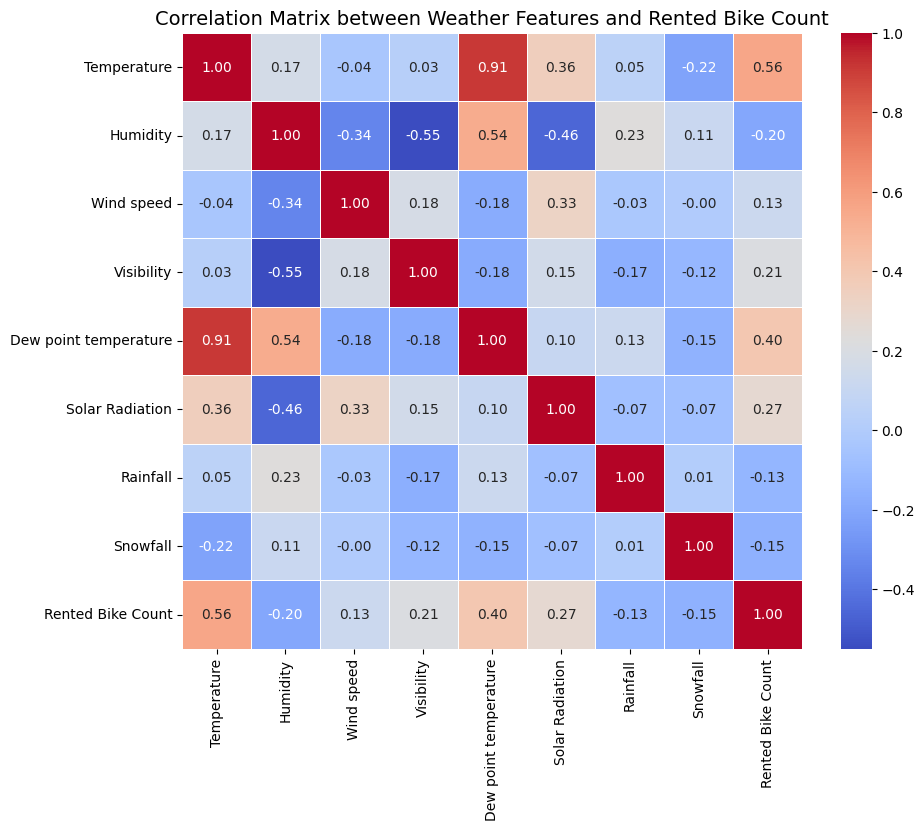

In [32]:
# Selecting variables of interest
weather_features = ['Temperature', 'Humidity', 'Wind speed', 'Visibility',
                         'Dew point temperature', 'Solar Radiation', 'Rainfall', 'Snowfall',
                         'Rented Bike Count']

# Computing correlation matrix
correlation_matrix = df[weather_features].corr()

# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix between Weather Features and Rented Bike Count", fontsize=14)
plt.show()

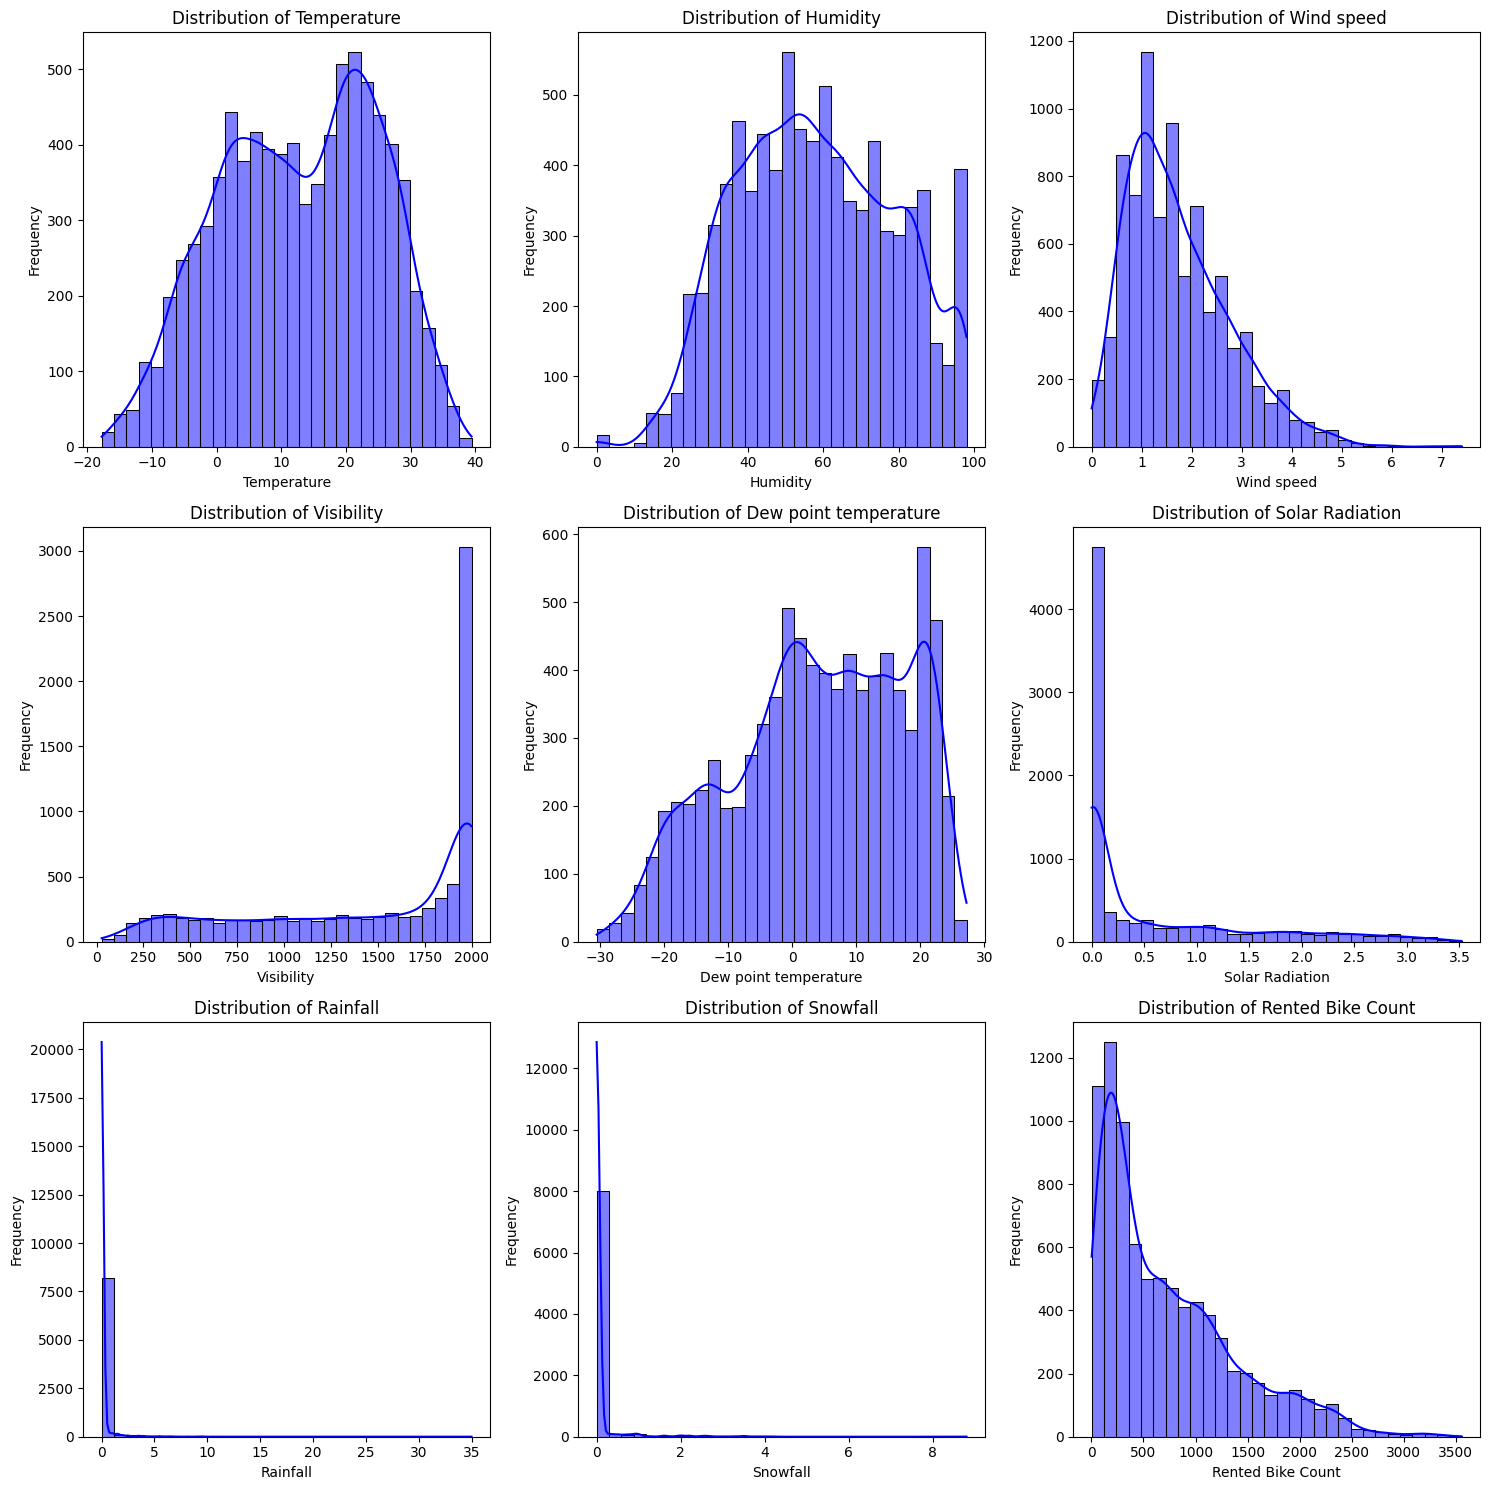

In [33]:

weather_features = ['Temperature', 'Humidity', 'Wind speed', 'Visibility', 
                      'Dew point temperature', 'Solar Radiation','Rainfall','Snowfall','Rented Bike Count']
plot_numerical_distributions(df,weather_features)


In [34]:
df['RainOrSnow'] = ((df['Rainfall'] > 0) | (df['Snowfall'] > 0)).astype(int)

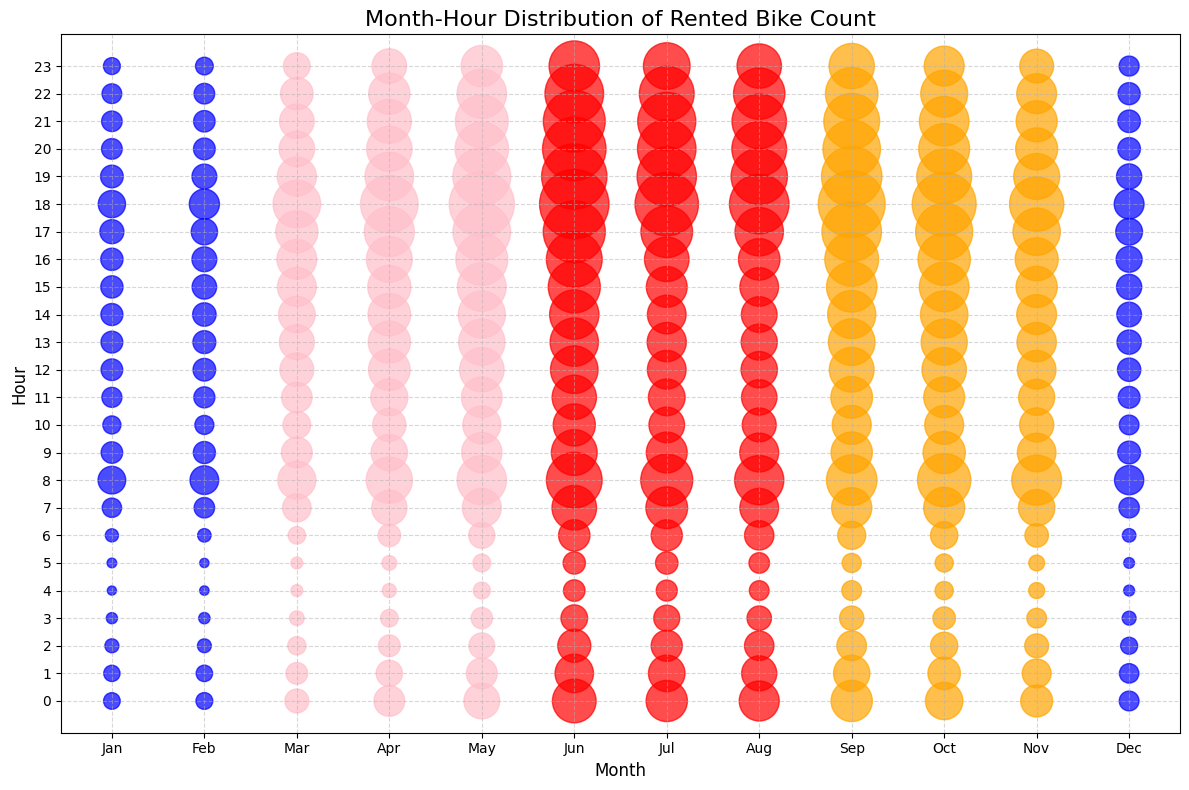

In [35]:
time_fearures = [
    "Date",
    "Hour",
    ]
plot_month_hour_distribution(df)

In [37]:
categorical_features = ['Holiday', 'Functioning Day','Week Status','Seasons']
categorical_stats = df[categorical_features].describe()
print("\nCategorical Columns Descriptive Statistics:")
print(categorical_stats)


Categorical Columns Descriptive Statistics:
           Holiday Functioning Day Week Status Seasons
count         8448            8448        8448    8448
unique           2               1           2       4
top     No Holiday             Yes     Weekday  Summer
freq          8040            8448        6024    2208


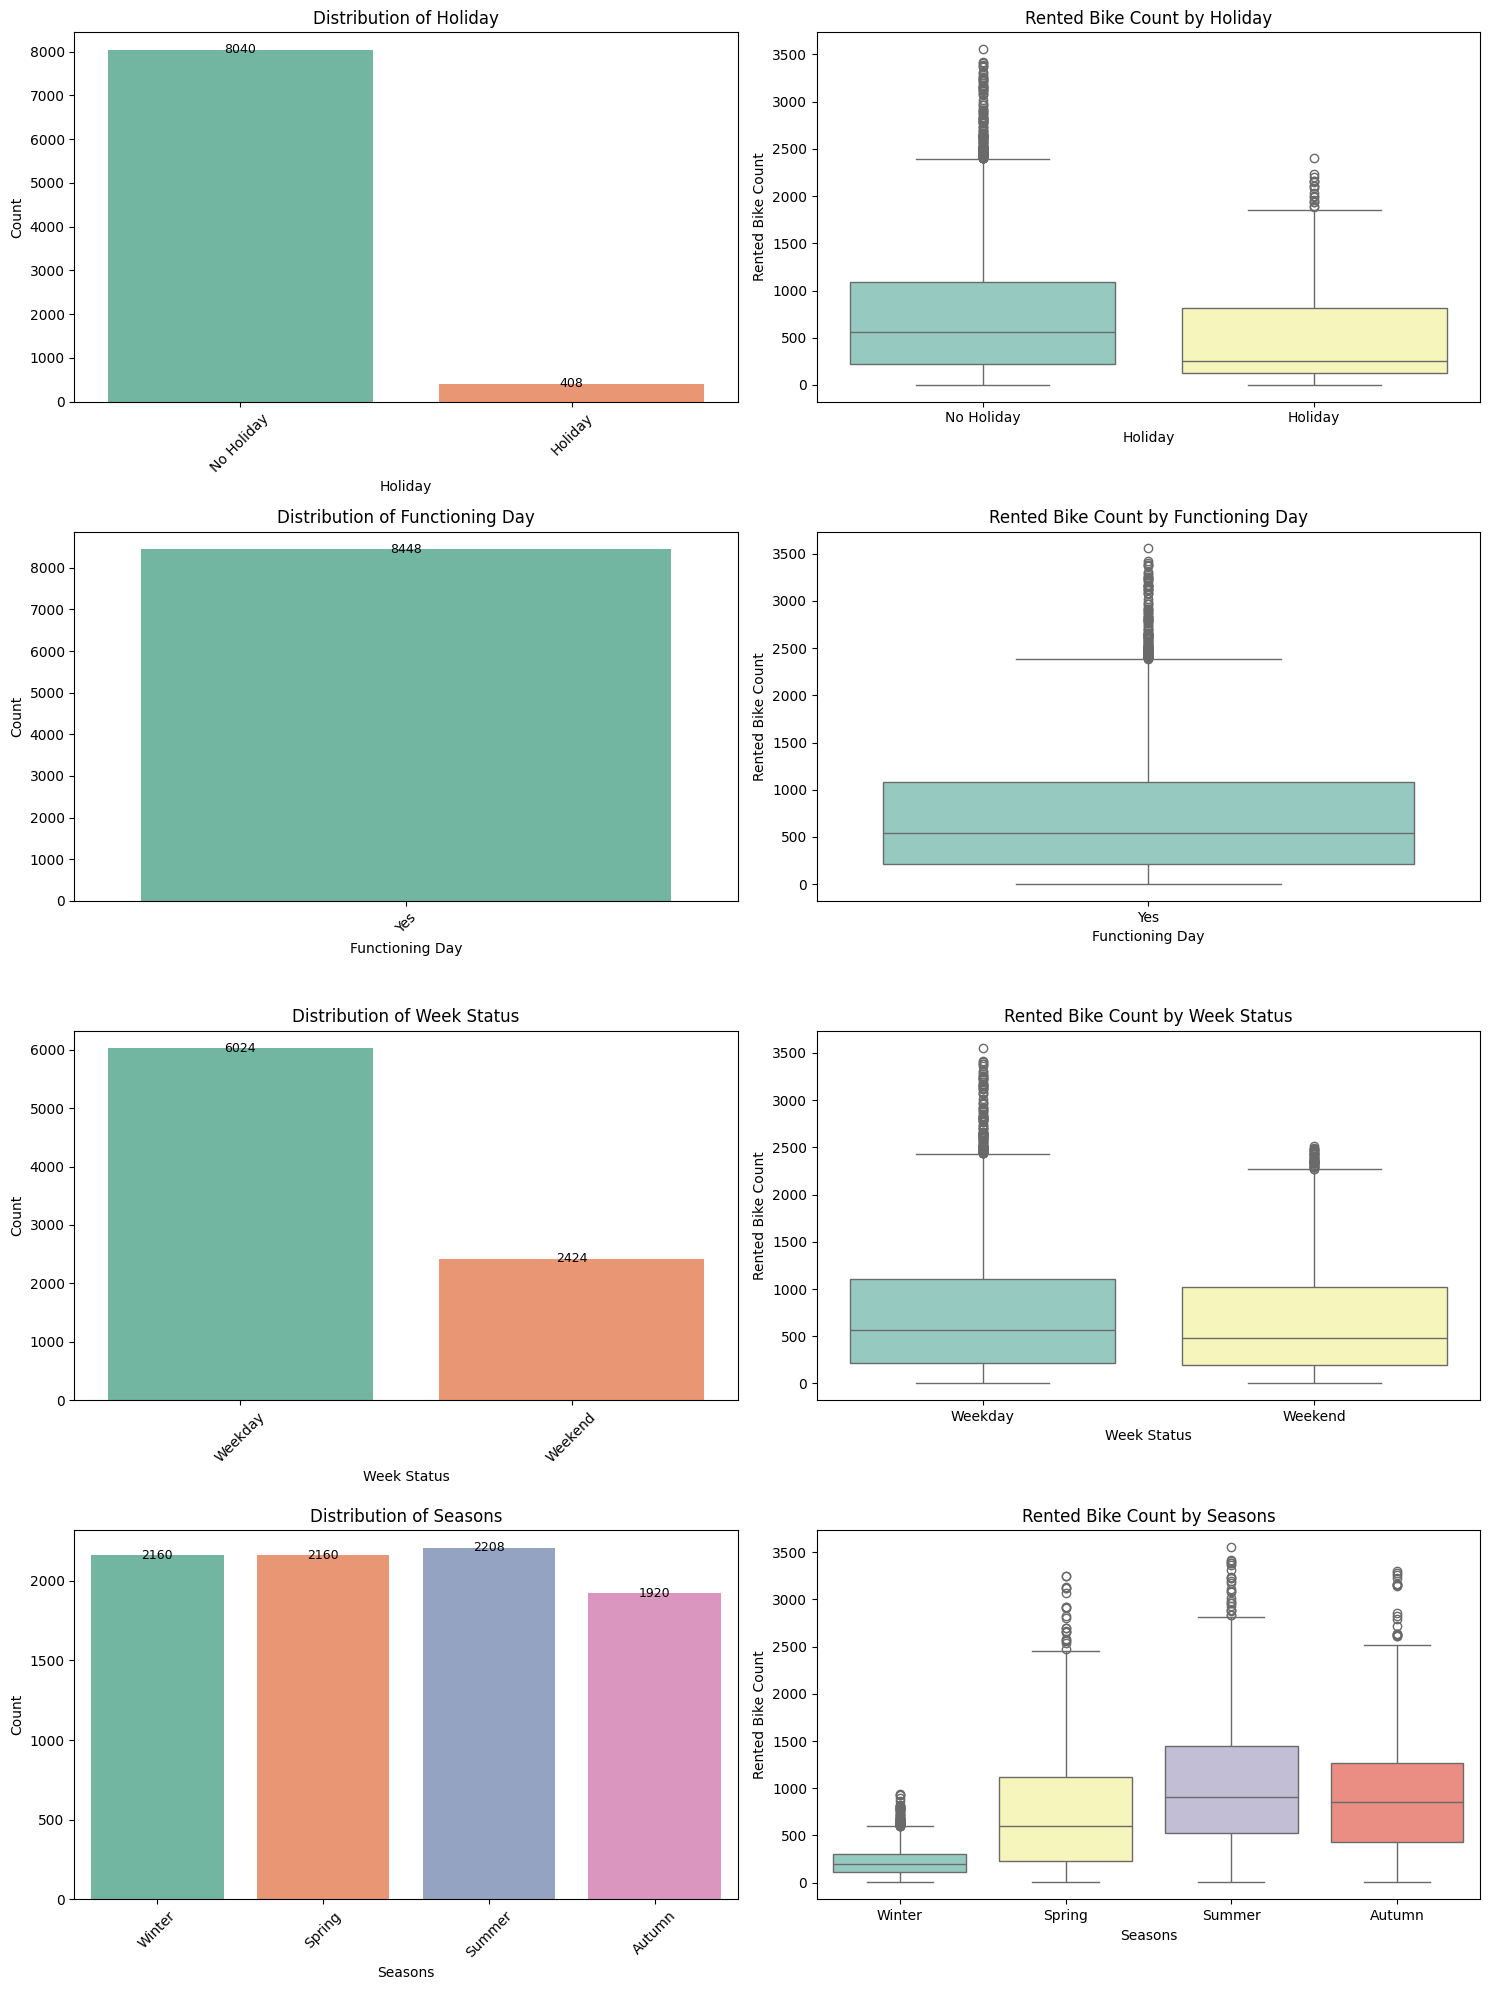

In [39]:
plot_categorical_distributions_and_boxplots(df,categorical_features,"Rented Bike Count")

In [42]:
data_folder = "../src/data"
os.makedirs(data_folder, exist_ok=True)  

output_filepath = os.path.join(data_folder, "cleaned_dataset.parquet")

features= [
    "Date",
    "Hour",
    'Holiday', 
    'Functioning Day',
    'Week Status',
    'Seasons',
    'Temperature', 
    'Humidity', 
    'Wind speed', 
    'Visibility', 
    'Dew point temperature', 
    'Solar Radiation',
    'RainOrSnow',
    'Rented Bike Count'
    ]

df[features].to_parquet(output_filepath, index=False)

print(f"Data saved in: {output_filepath}")


Data saved in: ../src/data\cleaned_dataset.parquet
